In [82]:
import pandas as pd
import matplotlib.pyplot as plt


data=pd.read_csv(r"C:\Users\kisho\Videos\Captures\kaggle data set\telecom_customer_churn.csv",index_col="Customer ID")
print(data.head())
print(data.shape)
print(data.columns)
print(data.info())
print(data.describe(percentiles=[0.1,0.3,0.5,0.7,1]))
print(data.dtypes)
print(data.head())

             Gender  Age Married  Number of Dependents          City  \
Customer ID                                                            
0002-ORFBO   Female   37     Yes                     0  Frazier Park   
0003-MKNFE     Male   46      No                     0      Glendale   
0004-TLHLJ     Male   50      No                     0    Costa Mesa   
0011-IGKFF     Male   78     Yes                     0      Martinez   
0013-EXCHZ   Female   75     Yes                     0     Camarillo   

             Zip Code   Latitude   Longitude  Number of Referrals  \
Customer ID                                                         
0002-ORFBO      93225  34.827662 -118.999073                    2   
0003-MKNFE      91206  34.162515 -118.203869                    0   
0004-TLHLJ      92627  33.645672 -117.922613                    0   
0011-IGKFF      94553  38.014457 -122.115432                    1   
0013-EXCHZ      93010  34.227846 -119.079903                    3   

           

In [83]:
data=data.iloc[1000:3000]
data['Total Revenue']=data["Total Revenue"].replace(0,2000)
data=data.dropna(axis=1)
print(data.columns)
data=data.drop(columns=["Total Extra Data Charges","Total Long Distance Charges","City","Total Refunds","Number of Referrals"])
print(data.columns)
print(data.shape)

Index(['Gender', 'Age', 'Married', 'Number of Dependents', 'City', 'Zip Code',
       'Latitude', 'Longitude', 'Number of Referrals', 'Tenure in Months',
       'Phone Service', 'Internet Service', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status'],
      dtype='object')
Index(['Gender', 'Age', 'Married', 'Number of Dependents', 'Zip Code',
       'Latitude', 'Longitude', 'Tenure in Months', 'Phone Service',
       'Internet Service', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charge', 'Total Charges', 'Total Revenue', 'Customer Status'],
      dtype='object')
(2000, 17)


In [84]:
from sklearn.preprocessing import LabelEncoder

label_e = LabelEncoder()
objects=["Gender","Married","Customer Status","Payment Method","Paperless Billing","Contract","Internet Service","Phone Service"]
for i in objects:
    data[i]=label_e.fit_transform(data[i])
print(data.head())

             Gender  Age  Married  Number of Dependents  Zip Code   Latitude  \
Customer ID                                                                    
1450-GALXR        0   33        0                     0     93626  37.027663   
1450-SKCVI        0   22        0                     0     92014  32.948262   
1452-KIOVK        1   42        0                     3     90007  34.027337   
1452-UZOSF        1   31        1                     1     95446  38.525760   
1452-VOQCH        1   61        0                     0     92347  34.983808   

              Longitude  Tenure in Months  Phone Service  Internet Service  \
Customer ID                                                                  
1450-GALXR  -119.690560                10              1                 1   
1450-SKCVI  -117.256086                56              1                 1   
1452-KIOVK  -118.285150                22              1                 1   
1452-UZOSF  -123.013347                72        

In [85]:
import seaborn as sns

for column,dtype in data.dtypes.items():
    if dtype==object:
        print(f"the data type {column}is object")

    elif dtype==pd.Int64Dtype or pd.Float64Dtype:
        # plt.Figure()
        # sns.boxplot(y=data[column])
        # plt.title(f"box plot of {column}")
        # plt.show()
        q1=data[column].quantile(0.25)
        q2=data[column].quantile(0.75)
        iqr=q2-q1
        lower_bound=q1-(1.5*iqr)
        upper_bound=q2+(1.5*iqr)
        outliers=data[(data[column]<lower_bound)|(data[column]>upper_bound)]
        if not outliers.empty:
           print(f"outliers of the {column} is {outliers}")
           data_filtered=data[(data[column]>=lower_bound)&(data[column]<=upper_bound)]
           data_reset=data_filtered.reset_index(drop=True)
           
        
        else:
          print(f"the {column} has no outlier")
          data[column]=data[column]
    
print(data.shape)

the Gender has no outlier
the Age has no outlier
the Married has no outlier
outliers of the Number of Dependents is              Gender  Age  Married  Number of Dependents  Zip Code   Latitude  \
Customer ID                                                                    
1452-KIOVK        1   42        0                     3     90007  34.027337   
1452-UZOSF        1   31        1                     1     95446  38.525760   
1452-XRSJV        0   59        1                     2     94612  37.809014   
1453-RZFON        0   39        0                     3     93608  36.488056   
1465-WCZVT        0   44        1                     3     93603  36.645450   
...             ...  ...      ...                   ...       ...        ...   
4277-BWBML        1   48        1                     2     93271  36.413433   
4277-UDIEF        1   51        1                     3     92567  33.827690   
4291-HPAXL        1   63        0                     2     95632  38.274451   
4291

In [86]:
from sklearn.preprocessing import StandardScaler

a=["Age","Tenure in Months","Zip Code","Latitude","Longitude","Tenure in Months","Total Revenue","Total Charges","Monthly Charge"]
scaler=StandardScaler()
for i in a:
    data[i]=scaler.fit_transform(data[i].values.reshape(-1,1))

print(data.head())

             Gender       Age  Married  Number of Dependents  Zip Code  \
Customer ID                                                              
1450-GALXR        0 -0.780389        0                     0  0.059968   
1450-SKCVI        0 -1.429581        0                     0 -0.807128   
1452-KIOVK        1 -0.249231        0                     3 -1.886696   
1452-UZOSF        1 -0.898424        1                     1  1.038948   
1452-VOQCH        1  0.872102        0                     0 -0.628007   

             Latitude  Longitude  Tenure in Months  Phone Service  \
Customer ID                                                         
1450-GALXR   0.317089   0.038208         -0.875590              1   
1450-SKCVI  -1.331138   1.158186          0.985173              1   
1452-KIOVK  -0.895152   0.684766         -0.390174              1   
1452-UZOSF   0.922374  -1.490437          1.632395              1   
1452-VOQCH  -0.508703   1.165906         -1.239653              1  

In [87]:
#building model by logistic reg
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

x=data.drop("Customer Status",axis=1)
y=data["Customer Status"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#without hyper parameter tuning

model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

accuracy=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)

print(f"the accuarcy of the model is{accuracy}")
print (f"the report for the model {report}")


the accuarcy of the model is0.815
the report for the model               precision    recall  f1-score   support

           0       0.62      0.71      0.67        98
           1       0.74      0.69      0.71        36
           2       0.91      0.87      0.89       266

    accuracy                           0.81       400
   macro avg       0.76      0.76      0.76       400
weighted avg       0.82      0.81      0.82       400



In [88]:
#hyper parameter tuning
from sklearn.model_selection import GridSearchCV

params={"penalty":["l1","l2"],
        "C":[0.001,0.01,0.1,1,10,100],
        "solver":["liblinear","saga"]}
grid_search=GridSearchCV(LogisticRegression(max_iter=10000),params,scoring="accuracy",error_score="raise")
grid_search.fit(x_train,y_train)

print("best parameters are:",grid_search.best_params_)
print("best accuarcy is:",grid_search.best_score_)

best parameters are: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
best accuarcy is: 0.784375


In [90]:
#after hyper parameter tuning

model=LogisticRegression(solver="saga",C=0.1,penalty="l1")
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

accuracy=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)

print(f"the accuarcy of the model is{accuracy}")
print (f"the report for the model {report}")

the accuarcy of the model is0.805
the report for the model               precision    recall  f1-score   support

           0       0.62      0.66      0.64        98
           1       0.80      0.56      0.66        36
           2       0.87      0.89      0.88       266

    accuracy                           0.81       400
   macro avg       0.77      0.70      0.73       400
weighted avg       0.81      0.81      0.80       400



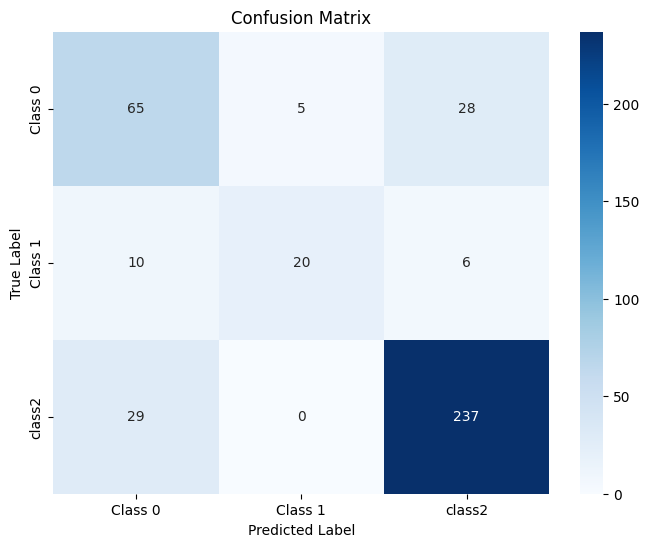

In [91]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1',"class2"],
            yticklabels=['Class 0', 'Class 1',"class2"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

